In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob
from notebooks.lib import read_xyz_alt, read_load, linear, mean_across

In [2]:
c_direct_neighbours = read_load("../data/c-3d-direct-neighbours", read_xyz_alt)
c_off_axis_neighbours = read_load("../data/c-3d-off-axis-neighbours", read_xyz_alt)

In [3]:
direct_meaned_by_N = mean_across(c_direct_neighbours)
offaxis_meaned_by_N = mean_across(c_off_axis_neighbours)

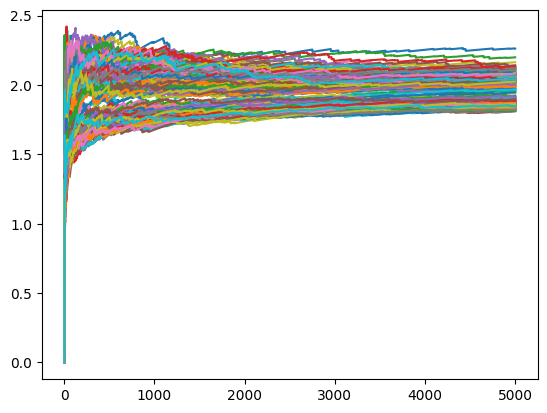

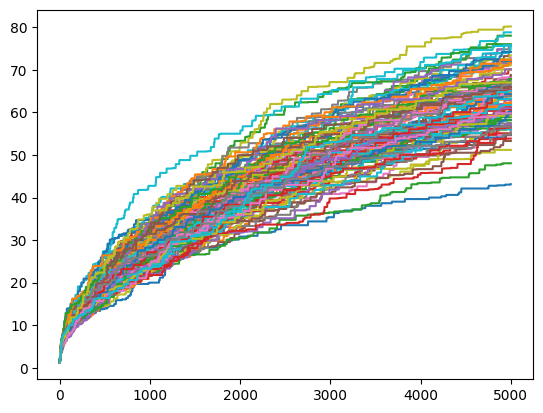

In [4]:
for _, c in c_direct_neighbours.groupby('run'):
    plt.plot(c.fd)

for _, c in c_off_axis_neighbours.groupby('run'):
    plt.plot(c.fd)

plt.show()

for _, run in c_direct_neighbours.groupby('run'):
    plt.plot(run.N, run.cr)

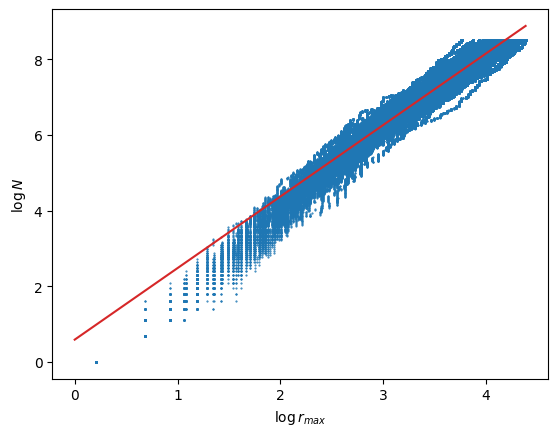

(array([1.89170474, 0.58907793]),
 array([[ 5.09493737e-07, -1.86623148e-06],
        [-1.86623148e-06,  6.96759885e-06]]))

In [5]:
without_prefix = c_direct_neighbours

p, pcov = scipy.optimize.curve_fit(linear, np.log(without_prefix.cr), np.log(without_prefix.N))
linear_extent = np.linspace(0, np.max(np.log(c_direct_neighbours.cr)))

plt.scatter(np.log(c_direct_neighbours.cr), np.log(c_direct_neighbours.N), s=1, marker='.', color="tab:blue")
plt.plot(linear_extent, linear(linear_extent, *p), color="tab:red")

plt.xlabel("$\\log r_{max}$")
plt.ylabel("$\\log N$")
plt.show()
p, pcov

/var/folders/yz/hjlw4lyn3rq0s5y_r82b55cw0000gn/T/ipykernel_38665/3346041710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mn = c_direct_neighbours.groupby("N").mean().reset_index()


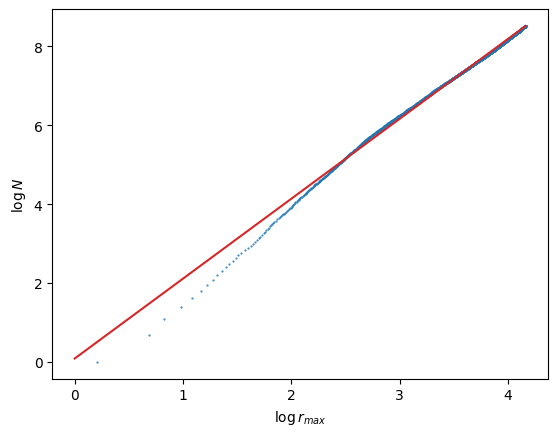

(array([1.89170474, 0.58907793]),
 array([[ 5.09493737e-07, -1.86623148e-06],
        [-1.86623148e-06,  6.96759885e-06]]))

In [6]:
mn = c_direct_neighbours.groupby("N").mean().reset_index()
mn_p, mn_pcov = scipy.optimize.curve_fit(linear, np.log(mn.cr), np.log(mn.N))
linear_extent = np.linspace(0, np.max(np.log(mn.cr)))

plt.scatter(np.log(mn.cr), np.log(mn.N), s=1, marker='.', color="tab:blue")
plt.plot(linear_extent, linear(linear_extent, *mn_p), color="tab:red")

plt.xlabel("$\\log r_{max}$")
plt.ylabel("$\\log N$")
plt.show()
p, pcov

In [7]:
rust_direct = read_load("../data/rust-3d", read_xyz_alt)
rust_direct_meaned_by_N = mean_across(rust_direct)

In [24]:
rust_offaxis = read_load("../data/rust-3d-offaxis", read_xyz_alt)
rust_offaxis_meaned_by_N = mean_across(rust_direct)

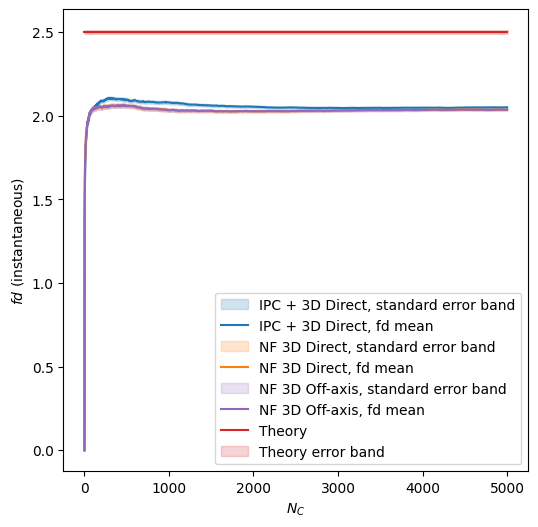

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))


def nc_fd(df, label, color=None, ignore_prefix=0):
    plt.fill_between(
        df.N,
        # TODO Check error math here
        (df[ignore_prefix:]['fd']['mean'] - df[ignore_prefix:]['fd']['stderr']),
        (df[ignore_prefix:]['fd']['mean'] + df[ignore_prefix:]['fd']['stderr']),
        color=color,
        alpha=0.2,
        label=f"{label}, standard error band"
    )

    plt.plot(
        df.N,
        df['fd']['mean'],
        color=color,
        label=f"{label}, fd mean"
    )


nc_fd(direct_meaned_by_N, label="IPC + 3D Direct", color="tab:blue")
# nc_fd(offaxis_meaned_by_N, label="IPC + 3D Off-axis", color="tab:green")
nc_fd(rust_direct_meaned_by_N, label="NF 3D Direct", color="tab:orange")
nc_fd(rust_offaxis_meaned_by_N, label="NF 3D Off-axis", color="tab:purple")

plt.plot([np.min(without_prefix.N), np.max(without_prefix.N)], [2.5, 2.5], color='tab:red', label='Theory')
plt.fill_between(without_prefix.N, 2.5 - 0.01, 2.5 + 0.01, alpha=0.2, color='tab:red', label='Theory error band')

plt.xlabel("$N_C$")
plt.ylabel("$fd$ (instantaneous)")
plt.legend()

plt.savefig('../figures/3d-nc-fd-convergence.svg')
plt.savefig('../figures/3d-nc-fd-convergence.png')

In [28]:
from notebooks.graphs import cr_n

(array([1.89170474, 0.58907793]),
 array([[ 5.09493737e-07, -1.86623148e-06],
        [-1.86623148e-06,  6.96759885e-06]]))

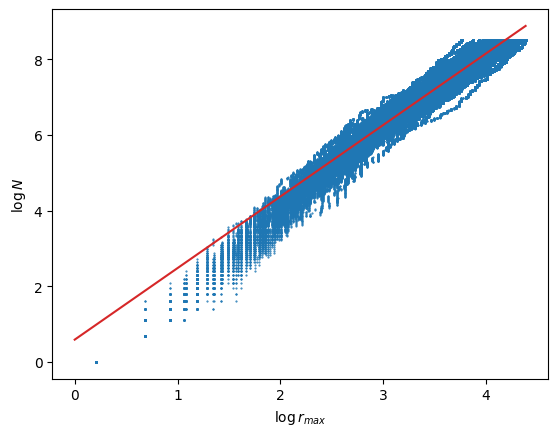

In [33]:
cr_n(c_direct_neighbours)

(array([1.90130968, 0.47834345]),
 array([[ 5.61079868e-07, -2.07748262e-06],
        [-2.07748262e-06,  7.83527791e-06]]))

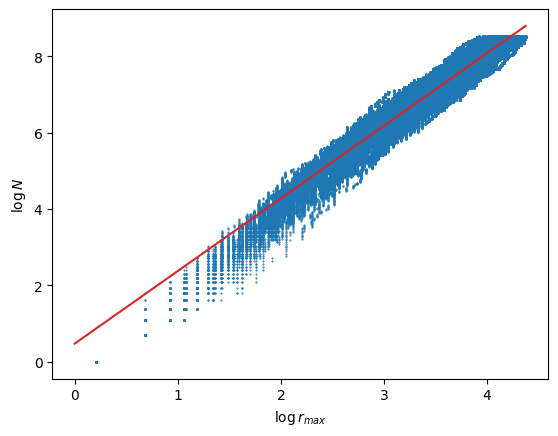

In [22]:
cr_n(rust_direct)

(array([1.89843243, 0.71870004]),
 array([[ 5.17525369e-07, -1.85359693e-06],
        [-1.85359693e-06,  6.77175199e-06]]))

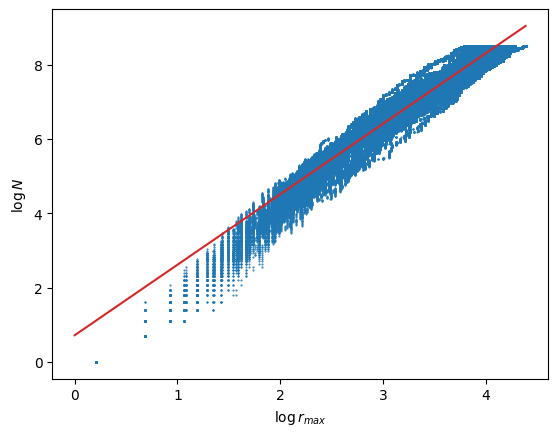

In [26]:
cr_n(rust_offaxis)